In [2]:
from syn_suite2p_utility import *
from syn_detector_utility import *
from syn_analysis_utility import *
from syn_plotting_utility import *

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pynapple as nap
import scipy.stats as stats
import pickle

In [13]:
with open(r'C:\Users\jcbegs\Desktop\Lab_Business\AG_Dean\calcium_imaging\calcium imaging videos\step3\exp_fit_DUP_wtRt_100k_.4ul_hSyn_DIV20_48h_ctrl_60x_c1_r002Dur180sInt20000msBin10000ms_filtered.pkl',
           'rb') as f:
    data = pickle.load(f)
df_cell_stats = data['cell_stats']
filtered_test = df_cell_stats[df_cell_stats["SpikesCount"]!=1]
filtered_test
final_test_df = filtered_test[filtered_test["SpikesCount"]!=0]
df_cell_stats = final_test_df

Text(38.097222222222214, 0.5, 'SynapseID')

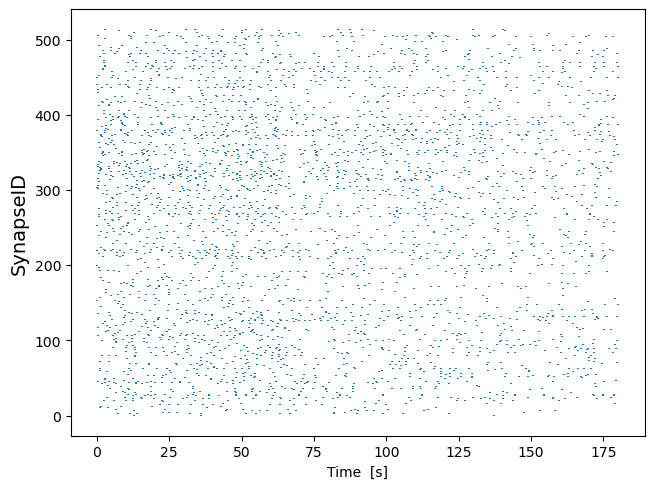

In [16]:
with open(r'C:\Users\jcbegs\Desktop\Lab_Business\AG_Dean\calcium_imaging\calcium imaging videos\step3\baselnwtRt_DIV20_AAV1_0.1ul_GCaMP_hSyn_48h_ctrl_well003_r002Dur180sInt20000msBin10000ms_filtered.pkl',
           'rb') as f:
    data = pickle.load(f)
df_cell_stats = data['cell_stats']
for i, idx in enumerate(final_test_df['SynapseID']):
#     print(idx)
    plt.eventplot(final_test_df[final_test_df['SynapseID']==idx]['PeakTimes'],lineoffsets=i,linelength=0.8)
#     i+=1
plt.tight_layout()
plt.xlabel('Time  [s]')
plt.ylabel('SynapseID', fontsize=14)

In [21]:
# There is an issue with visualising different lengths of your measurement. In the plot it looks like all time lenghts are the same,
# but they are not. Thus, the perception of the effect you show is biased! That's why the importance of using same length times. 
# We definitely need to fix this for a publication.


#---------------------------------------------------------------------------------------------#
# set the individual timestamps
Timestamp1=240
# Timestamp2=180
EndOfVid=480

# set the figure title
figureTitle='Spontaneous synaptic events & their amplitudes over time (DIV20)'

# Treatment options: 'PDBu [1 µM]' / 'AP5 [50 µM]' / 'CNQX [10 µM]'
treatment1='vehicle'
# treatment2= 'APV [50 µM]' 

# set the filename
FileName='PDBu.png'

#---------------------------------------------------------------------------------------------#
index=0
SynapseID_array=[]
PeakTime_array=[]
Amplitudes_array=[]

for i, idx in enumerate(final_test_df['SynapseID']):
    SynapseID_array.append(final_test_df['SynapseID'][idx])
    PeakTime_array.append(final_test_df['PeakTimes'][idx])
    Amplitudes_array.append(final_test_df['Amplitudes'][idx])

new_array=(SynapseID_array,PeakTime_array,Amplitudes_array)
new_df=pd.DataFrame(new_array)
T_new_df= new_df.transpose()


### Plot spike times and display each condition in a separate subplot

NameError: name 'T_new_df' is not defined

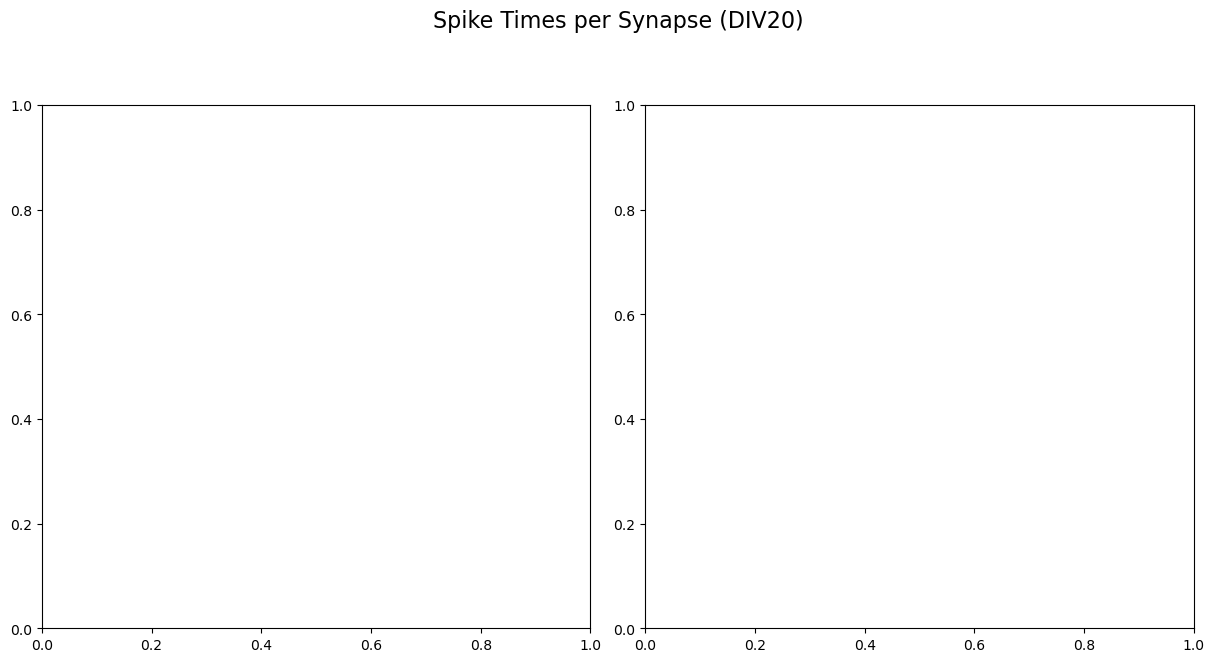

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2)#, gridspec_kw={'width_ratios': [2.5, 5, 2.5]})
plt.subplots_adjust(left=0.2, bottom=None, right=2, top=1.2, wspace=0.1, hspace=None)
fig.suptitle('Spike Times per Synapse (DIV20)', y=1.4, x=1.1, fontsize=16)

for row in range(0,len(T_new_df)):
    ax1.eventplot(T_new_df[1][row],lineoffsets=row,linelength=2,linewidths=2, colors=f'C{row}')
ax1.set_title('baseline', fontsize=14)
#ax1.set_xlabel('Time  [s]')
ax1.set_ylabel('SynapseId', fontsize=14)
ax1.set_xlim(left=5,right=Timestamp1) 
ax1.tick_params(labelsize='large')

for row in range(0,len(T_new_df)):
    ax2.eventplot(T_new_df[1][row],lineoffsets=row,linelength=2,linewidths=2, colors=f'C{row}')
ax2.set_title(treatment1, fontsize=14)
ax2.set_xlabel('Time  [s]',fontsize=14)
ax2.set_xlim(left=Timestamp1+1,right=Timestamp2+4) 
ax2.tick_params(labelsize='large')
ax2.tick_params('y', labelleft=False)

for row in range(0,len(T_new_df)):
    ax3.eventplot(T_new_df[1][row],lineoffsets=row,linelength=2,linewidths=2, colors=f'C{row}')
ax3.set_title(treatment2, fontsize=14) 
#ax3.set_xlabel('Time [s]')
ax3.set_xlim(left=Timestamp2+5, right=EndOfVid) 
ax3.tick_params(labelsize='large')
ax3.tick_params('y', labelleft=False)    # make these tick labels invisible

# APV [50 µM] # CNQX 10 µM  #PDBu 1 µM

# plt.savefig(r'C:\Users\jcbegs\Desktop\Lab_Business\AG_Dean\calcium_imaging\calcium imaging videos\presentations\control_PDbu_APV_rasterplot.png', bbox_inches='tight')
plt.show()


KeyError: 'SynapseId'

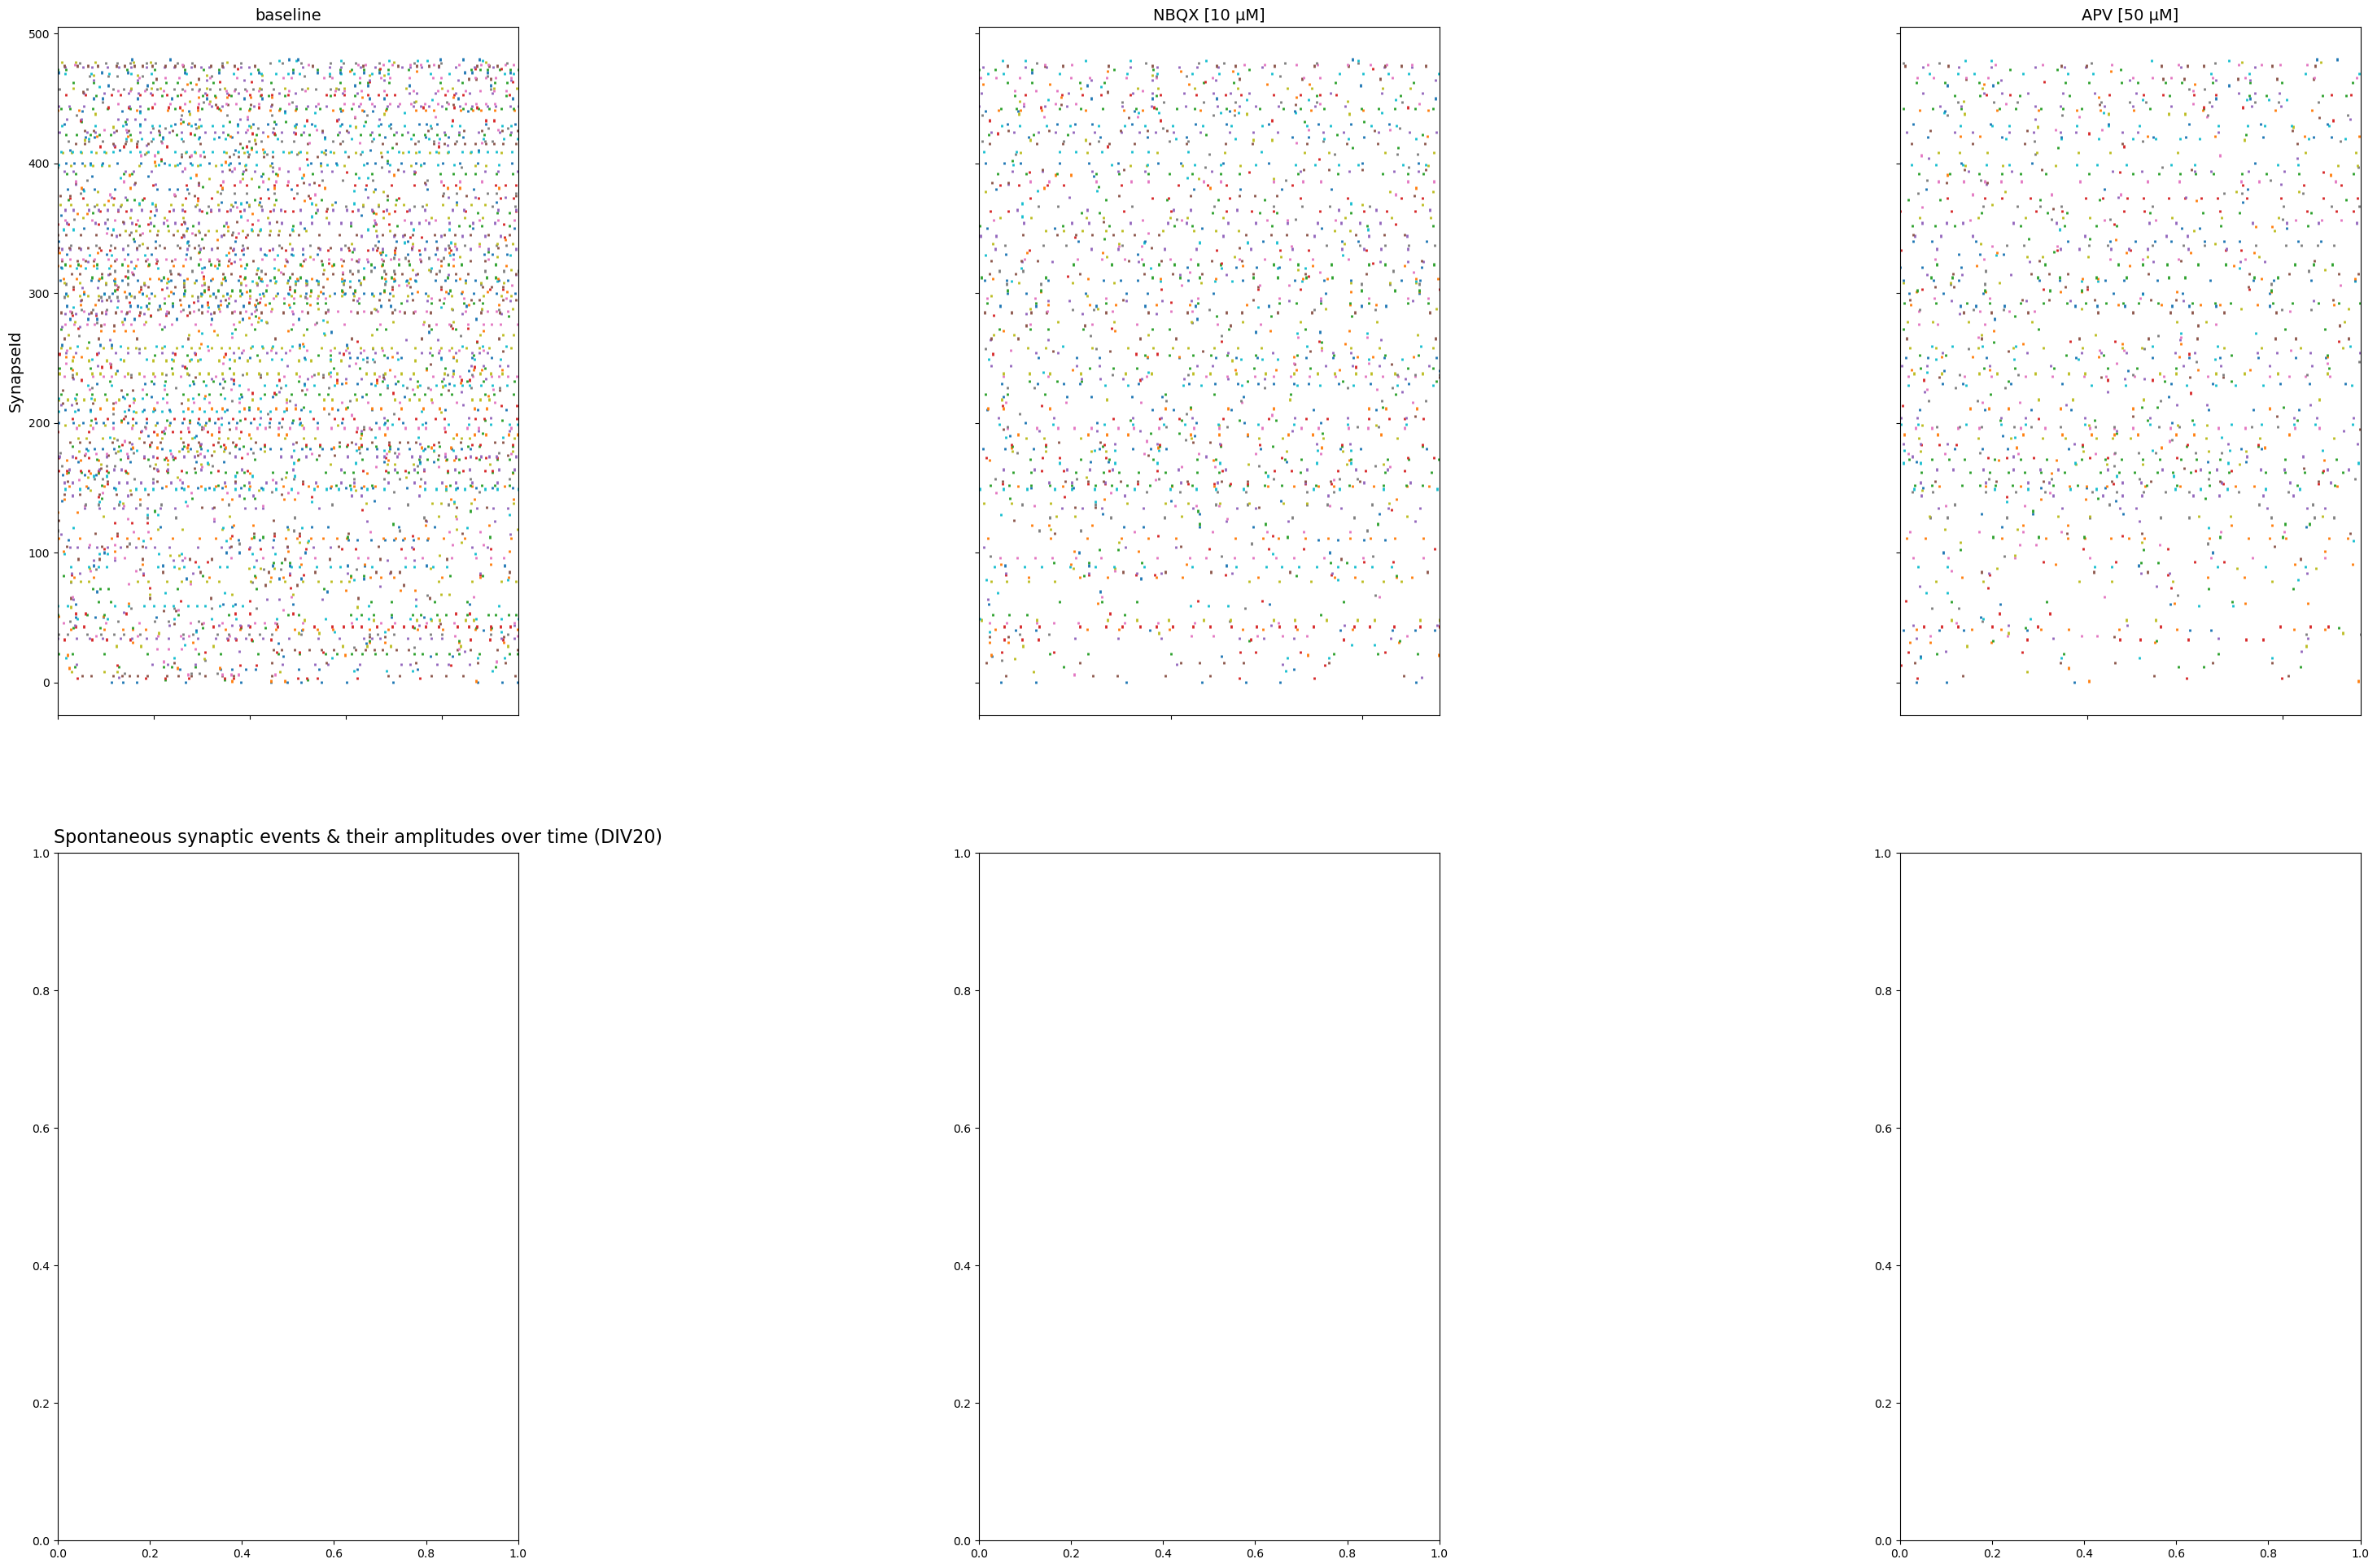

In [88]:
plotFontSize=14


cm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(2, 3, figsize=(25*cm, 25*cm))
plt.subplots_adjust(left=None, bottom=None,right=3, top=2, wspace=1, hspace=None) # right=2, top=1.2, wspace=0.1, 

#plt.subplots()
fig.suptitle(figureTitle, y=1, fontsize=16) #, y=1.4, x=1.1

axs[0, 0].set_xticks(np.arange(0, Timestamp1, 25))
for row in range(0,len(T_new_df)):
    axs[0, 0].eventplot(T_new_df[1][row],lineoffsets=row,linelength=2,linewidths=2, colors=f'C{row}')
axs[0, 0].set_title('baseline', fontsize=plotFontSize)
axs[0, 0].set_ylabel('SynapseId', fontsize=plotFontSize)
axs[0, 0].set_xlim(left=0,right=Timestamp1) 
axs[0, 0].tick_params('x', labelbottom=False)

#axs[0, 0].tick_params(labelsize='large') #ax1.set_xlabel('Time  [s]')

axs[0, 1].set_xlim(left=Timestamp1+1,right=Timestamp2) 
for row in range(0,len(T_new_df)):
    axs[0, 1].eventplot(T_new_df[1][row],lineoffsets=row,linelength=2,linewidths=2, colors=f'C{row}')
axs[0, 1].set_title(treatment1, fontsize=plotFontSize)
axs[0, 1].set_xticks(np.arange(Timestamp1,Timestamp2, 25))
axs[0, 1].tick_params('y', labelleft=False)
axs[0, 1].tick_params('x', labelbottom=False)

#axs[0, 1].set_xlabel('Time  [s]',fontsize=plotFontSize)
#axs[0, 1].tick_params(labelsize='large')

axs[0, 2].set_xticks(np.arange(Timestamp2,EndOfVid, 25))
for row in range(0,len(T_new_df)):
    axs[0, 2].eventplot(T_new_df[1][row],lineoffsets=row,linelength=2,linewidths=2, colors=f'C{row}')
axs[0, 2].set_title(treatment2, fontsize=plotFontSize)
axs[0, 2].set_xlim(left=Timestamp2+1, right=EndOfVid) 
axs[0, 2].tick_params('y', labelleft=False)    # make these tick labels invisible #ax3.set_xlabel('Time [s]')
axs[0, 2].tick_params('x', labelbottom=False)   # axs[0, 2].tick_params(labelsize='large')

#------------- plotting amplitude vs spike times -------------#

my_tsd = {}
for idx in df_cell_stats['SynapseId'][0:]:
    my_tsd[idx] = nap.Tsd(t=df_cell_stats[df_cell_stats['SynapseId']==idx]['PeakTimes'][idx],
                          d=df_cell_stats[df_cell_stats['SynapseId']==idx]['Amplitudes'][idx],time_units='s')

Interval_1 = nap.IntervalSet(0,Timestamp1)
Interval_2 = nap.IntervalSet(Timestamp1+1,Timestamp2)
Interval_3 = nap.IntervalSet(Timestamp2+1,EndOfVid)
    
interval_set = [Interval_1,
                Interval_2,
                Interval_3]# 

import warnings
warnings.filterwarnings('ignore')       ## just to get rid of the warnings


## plot spike time vs amplitude in each intervals

for i in range(2):
    if i==0:
        #axs[1, 0].set_title('baseline',fontsize=plotFontSize)
        axs[1, 0].set_ylabel('amplitude [AU]',fontsize=plotFontSize)
        #axs[1, 0].set_xlabel('Spike time [s]',fontsize=plotFontSize)
        axs[1, 0].set_xticks(np.arange(0, Timestamp1, 25))
        plt.ylim((0,275))
        for idx in my_tsd.keys():
            axs[1, 0].plot(my_tsd[idx].restrict(interval_set[i]).index,my_tsd[idx].restrict(interval_set[i]).values,color=f'C{idx}',marker='o',ls='',alpha=0.5)
        plt.tight_layout()

    if i==1:
        #axs[1, 1].set_title(treatment1,fontsize=plotFontSize)
        #axs[1, 1].set_xlabel('Amplitude [AU]',fontsize=plotFontSize)
        axs[1, 1].set_xlabel('time [s]',fontsize=plotFontSize)
        axs[1, 1].set_xticks(np.arange(Timestamp1, 25))
        axs[1, 1].tick_params('y', labelleft=False)
        plt.ylim((0,275))

        for idx in my_tsd.keys():
            axs[1, 1].plot(my_tsd[idx].restrict(interval_set[i]).index,my_tsd[idx].restrict(interval_set[i]).values,color=f'C{idx}',marker='o',ls='',alpha=0.5)
        plt.tight_layout()
    # if i==2:
    #     axs[1, 2].set_xticks(np.arange(Timestamp2, EndOfVid, 25))
    #     #axs[1, 2].set_title(treatment2,fontsize=plotFontSize)
    #     #axs[1, 2].set_xlabel('Amplitude [AU]',fontsize=plotFontSize)
    #     #axs[1, 2].set_xlabel('Spike time [s]',fontsize=plotFontSize)
    #     axs[1, 2].tick_params('y', labelleft=False)
    #     plt.ylim((0,275))

        for idx in my_tsd.keys():
            axs[1, 2].plot(my_tsd[idx].restrict(interval_set[i]).index,my_tsd[idx].restrict(interval_set[i]).values,color=f'C{idx}',marker='o',ls='',alpha=0.5)
        plt.tight_layout()

plt.savefig('Combined'+FileName, bbox_inches='tight')
plt.show()

In [ ]:
# # Videos with only 2 conditions

# fig, (ax1, ax2) = plt.subplots(1, 2)
# plt.subplots_adjust(left=0.2, bottom=None, right=2, top=1.2, wspace=0.1, hspace=None)
# fig.suptitle('Spike Times per Synapse (DIV16)', y=1.4, x=1.1, fontsize=16)

# for row in range(0,len(T_new_df)):
#     ax1.eventplot(T_new_df[1][row],lineoffsets=row,linelength=3,linewidths=2, colors=f'C{row}')
# ax1.set_title('baseline', fontsize=14)
# ax1.set_xlabel('Time  [s]',fontsize=14)
# ax1.set_ylabel('SynapseId', fontsize=14)
# ax1.set_xlim(left=0,right=145) 
# ax1.tick_params(labelsize='large')

# for row in range(0,len(T_new_df)):
#     ax2.eventplot(T_new_df[1][row],lineoffsets=row,linelength=3,linewidths=2, colors=f'C{row}')
# ax2.set_title('AP5 [50 µM]', fontsize=14) # 1 µM
# ax2.set_xlabel('Time  [s]',fontsize=14)
# ax2.set_xlim(left=145) 
# ax2.tick_params(labelsize='large')
# ax2.tick_params('y', labelleft=False)

# # APV # 50 µM

# plt.savefig(FileName, bbox_inches='tight')
# plt.show()

In [ ]:
Timestamp2

### plot spike time vs amplitude in each intervals

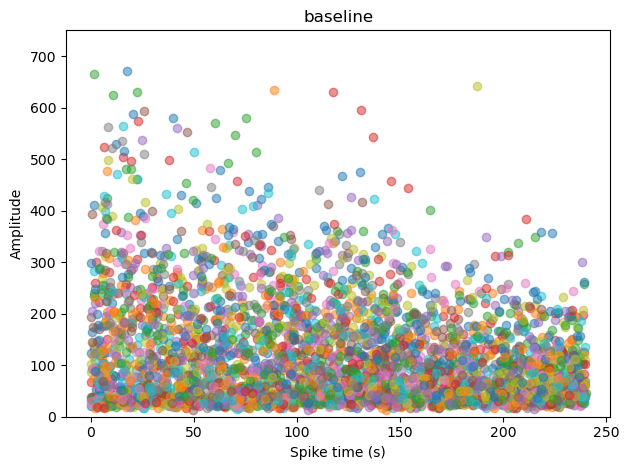

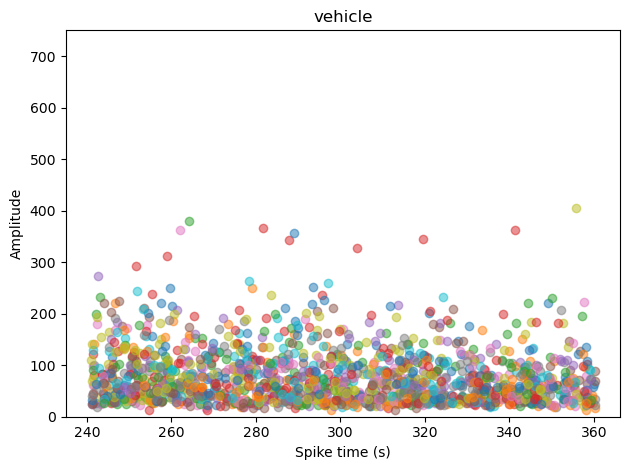

In [22]:
## here I generate a dictionary that contains nap.Tsd (timeseries data) objects, which is easy to handle when you want to do
## so you can later all each neurons with their ids

my_tsd = {}
for idx in df_cell_stats['SynapseID'][0:]:
    my_tsd[idx] = nap.Tsd(t=df_cell_stats[df_cell_stats['SynapseID']==idx]['PeakTimes'][idx],
                          d=df_cell_stats[df_cell_stats['SynapseID']==idx]['Amplitudes'][idx],time_units='s')

    
## Define the intervals you want to extract, here the unit is in second, so might be different from frames.
## You can later use the .restrict(intervals) function on the nap.Tsd object to only extract the events 
## happening in this period of time.

Interval_1 = nap.IntervalSet(0,Timestamp1)
Interval_2 = nap.IntervalSet(Timestamp1+1,EndOfVid)
# Interval_3 = nap.IntervalSet(Timestamp2+11,EndOfVid)
    
interval_set = [Interval_1,
                Interval_2]#,
                # Interval_3]# 

## you can change this to any other interval values
## There will be error messages when there is not spikes in the list after the restriction, 
## but you can just ignore that. Here I shut that down in this cell.

import warnings
warnings.filterwarnings('ignore')
## just to get rid of the warnings


## plot spike time vs amplitude in each intervals
plt.figure()
for i in range(2):
    if i==0:
        plt.title('baseline')
    if i==1:
        plt.title(treatment1)
    if i==2:
        plt.title(treatment2)
    for idx in my_tsd.keys():
        plt.plot(my_tsd[idx].restrict(interval_set[i]).index,my_tsd[idx].restrict(interval_set[i]).values,color=f'C{idx}',marker='o',ls='',alpha=0.5)
    plt.ylabel('Amplitude')
    plt.ylim(0,750)
    plt.xlabel('Spike time (s)')
    plt.tight_layout()
    
    plt.show()
# plt.savefig(r'C:\Users\jcbegs\Desktop\Lab_Business\AG_Dean\calcium_imaging\calcium imaging videos\presentations\control_Amplitudes', bbox_inches='tight')
    

## You can then just group the amplitude as you want for later analysis

In [ ]:
transient_count = []
for idx in my_tsd.keys():
    transient_count.append(my_tsd[idx].restrict(interval_set[0]).shape[0])

### Next, synaptic events are counted and summed up for each interval (experimental condition)

In [ ]:
# JC, you wanted it to ignore the rows where the count is 0, I'm not sure if it does that...

transient_count_int1 = 0
for idx in my_tsd.keys():
    transient_count_int1=transient_count_int1+len(my_tsd[idx].restrict(interval_set[0]))

transient_count_int2 = 0
for idx in my_tsd.keys():
    transient_count_int2=transient_count_int2+len(my_tsd[idx].restrict(interval_set[1]))

transient_count_int3 = 0
for idx in my_tsd.keys():
    transient_count_int3=transient_count_int3+len(my_tsd[idx].restrict(interval_set[2]))


print(transient_count_int1, transient_count_int2, transient_count_int3)

In [ ]:
T_new_df

In [ ]:
Int1_amp=[]
for idx in my_tsd.keys():
    Int1_amp.append(pd.DataFrame(my_tsd[idx].restrict(interval_set[0])))
# Int2_amp_df=pd.DataFrame(my_tsd.restrict(interval_set[1]))
# Int3_amp_df=pd.DataFrame(my_tsd.restrict(interval_set[2]))
Int1_amp_df=pd.DataFrame(Int1_amp)
Int1_amp_df

In [ ]:
amp1=Int1_amp_df[0][0]
amp1[0]

In [ ]:
#sums up the wrong values
amp1=T_new_df[2][0]
sum=0

for i in range(0,len(amp1)):
    sum=sum+amp1[i]

sum

In [ ]:
#like above, sums up the wrong values
#amp1=T_new_df[2][0]

All_SumAmp=[]

for i in range(0,len(T_new_df[2][i])):
    AmpEvents=T_new_df[2][i]
    Event_SumAmp=0
    
    for event in range(0,len(AmpEvents)):
        Event_SumAmp=Event_SumAmp+AmpEvents[event]
        
    All_SumAmp.append(Event_SumAmp)
    
All_SumAmp

In [ ]:
# FOR LARISSA
""" We need to get the count of the total number of synapses present in a certain interval (e.g. len(transient_count) maybe
        BUT it needs to ignore the rows where the count is 0 (which happens for a few synapses)

    secondly, we also need to get an average amplitude for each individual synapse detected so that we can plot these
    
    lastly, we need to build a pandas dataframe with the following column structure:
            
        
ROI # | transient_count | Average Amplitude | Frequency (transient # divided by # seconds) | condition (e.g. Baseline vs PDBu vs CNQX) | filename
"""

In [ ]:
#convert to pandas and build dataframe

pd.DataFrame(#insert variable)